# How Has Our Activity Changed Since the Peak of the Covid-19 Pandemic
#### Presented By: Liam Navarre
#### Course: CPSC 222, Fall 2021


## Introduction 
I believe the topic of college activity is extremely important, especially due to the Covid-19 pandemic. Personally, I found myself walking less than 1,000 steps in a day due to there not being a reason to be active. With these ideas in place, I thought it would be prudent to run an analysis on the activity habits of college students during Fall semester of 2020 and Fall semester of 2021. 

### About the Data
The data will be formatted in a .CSV file, which will be utilized to combine and clean data efficiently. The tables include data such as step count, distance walked, headphone exposure, and the amount of flights climbed in a day. Step count entails the amount of steps an individual took in a day, the distance walked explains how many miles you walked in a day, and the amount of flights climbed in a day shows how many flights the user has climbed in a given day. 

### Classification
I'm trying to show how ones activity might have increased or decreased due the fluid motion of the Covid-19 pandemic. This study would show negative or positive benefits upons one activity during the height of the pandemic. I will be creating my classification based on if an unseen instance goes to Gonzaga or SantaClara. The potential impacts of my results could be how universities try to increase their activity threshold of their student body. In a more unethical sense, the impacts could tell certain companies how to market to these type of populations, specifically before and after the pandemic. The stakeholder's in this instance would be students who attend either university. This could also be applied to students in general if enough data was collected nationally. 

# Data Analysis:  

## Cleaning Data

In [337]:
#Declaring Libraries
import pandas as pd
import scipy.stats as stats
import importlib
import utils
importlib.reload(utils)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [338]:
# For Liam Navarre
liam_health_data_df =  pd.read_csv("LiamHealthData.csv", index_col=0) 

print("Gonzaga Health Data Frame Before Cleaning: ")
print(liam_health_data_df.describe())

liam_health_data_df = utils.clean_data(liam_health_data_df)
liam_health_data_df = utils.load_test_value("yes",liam_health_data_df)

print("Gozaga Health Data Frame After Cleaing")
print(liam_health_data_df.describe())
liam_health_data_df.to_csv("Liam_Cleaned_health_data.csv")

#For Anabella Hugo
ana_health_data_df =  pd.read_csv("AnaHealthData.csv", index_col=0) 

print("Santa Clara Health Data Frame Before Cleaning: ")
print(ana_health_data_df.describe())

ana_health_data_df = utils.clean_data(ana_health_data_df)
ana_health_data_df = utils.load_test_value("no", ana_health_data_df)

ana_health_data_df.drop("Walking Double Support Percentage (%)", axis=1, inplace=True)
ana_health_data_df.drop("Weight & Body Mass (lb)", axis=1, inplace=True)
ana_health_data_df.drop("Height (cm)", axis=1, inplace=True)

print("Santa Clara Health Data Frame After Cleaing")
print(ana_health_data_df.describe())
ana_health_data_df.to_csv("Ana_Cleaned_health_data.csv")




Gonzaga Health Data Frame Before Cleaning: 
       Active Energy (kcal)  Apple Exercise Time (min)  \
count                   0.0                        0.0   
mean                    NaN                        NaN   
std                     NaN                        NaN   
min                     NaN                        NaN   
25%                     NaN                        NaN   
50%                     NaN                        NaN   
75%                     NaN                        NaN   
max                     NaN                        NaN   

       Apple Stand Hour (count)  Apple Stand Time (min)  \
count                       0.0                     0.0   
mean                        NaN                     NaN   
std                         NaN                     NaN   
min                         NaN                     NaN   
25%                         NaN                     NaN   
50%                         NaN                     NaN   
75%                 

### Reflection
I started my data cleaning process by importing the health files and stripping the columns that had less than 75% of their data. After receiving the cut down version of health data, I then interpolated the data to fill the missing values. I followed this by back filling and forward filling the rest for a complete dataframe. I had some trouble cleaning the data due to the Santa Clara data set having more information than the Gonzaga data set. I built a function the clean the data but it will not work in the same manner that it does with Gonzaga on Santa Clara. 

### Continued:
The data tables will be combined and compared on the date attribute. This is because the data gathered is over the same span of time and following the same formmatting along the "Date" column. The challenges I've faced with data preparation is trying to decide how much data is enough data, what data to specifically use in the set, and removing some unwanted columns from the input file. I also utilized interpolate to fill the middle values which was then supplemented with a backfill and forward fill to complete the data set.

## Activty for Fall 2020 and Fall 2021 EDA

#### 1. Identify the null and alternative hypothesis

$H_o$: The average activity, measured in step count, distance walked, and flights climbed, in Fall of 2021 will be less than or equal to the average activity in Fall of 2020

*  ( $\mu_{Fall2021}$ $\le$ $\mu_{Fall2020}$)  

$H_1$:  The average activity in Fall of 2021 will be more than the average activity in Fall of 2020
*  ( $\mu_{Fall2021}$ > $\mu_{Fall2020}$)

#### 2. Level of significance 

*  $\alpha$ = 0.005

#### 3. Select the appropriate test statistic 

## * $t = \frac{\overline{d} - \mu_d}{S_{\overline{d}}}$

#### 4. Formulate the decision value 
* $\alpha$ = 0.005  
* 1-tailed test  
* df = 120

if t-computed > 2.617, then reject $H_o$  
if t-computed $\le$ 2.617, do not reject $H_o$

#### Description 
The data encompasses health statistics from the past year. It was collected from two college students going to Gonzaga University and Santa Clara University. It describes step count, distance walked, and flights climbed. I will be using a one tailed two sample test because there are two samples involved and the test will be dealing with inequality rather than being equal to. The test will be dependent because we will be comparing the affects of the pandemic on the activity of two college students. 

In [339]:
liam_health_data_2020_df = liam_health_data_df["2020-09-01 00:00:00":"2020-11-21 00:00:00"]
ana_health_data_2020_df = ana_health_data_df["2020-09-01 00:00:00":"2020-11-21 00:00:00"]

liam_health_data_2021_df = liam_health_data_df["2021-09-01 00:00:00":"2021-11-21 00:00:00"]
ana_health_data_2021_df = ana_health_data_df["2021-09-01 00:00:00":"2021-11-21 00:00:00"]

#For steps 
liam_steps_2020_ser = liam_health_data_2020_df["Step Count (count)"]
ana_steps_2020_ser = ana_health_data_2020_df["Step Count (count)"]

liam_steps_2021_ser = liam_health_data_2021_df["Step Count (count)"]
ana_steps_2021_ser = ana_health_data_2021_df["Step Count (count)"]

# For distance walked/ran
liam_walk_dis_2020_ser = liam_health_data_2020_df["Walking + Running Distance (mi)"]
ana_walk_dis_2020_ser = ana_health_data_2020_df["Walking + Running Distance (mi)"]

liam_walk_dis_2021_ser = liam_health_data_2021_df["Walking + Running Distance (mi)"]
ana_walk_dis_2021_ser = ana_health_data_2021_df["Walking + Running Distance (mi)"]

# For Flights climbed 
liam_flights_2020_ser = liam_health_data_2020_df["Flights Climbed (count)"]
ana_flights_2020_ser = ana_health_data_2020_df["Flights Climbed (count)"]

liam_flights_2021_ser = liam_health_data_2021_df["Flights Climbed (count)"]
ana_flights_2021_ser = ana_health_data_2021_df["Flights Climbed (count)"]

#T testing 
utils.steps_t_test(liam_steps_2021_ser, liam_steps_2020_ser, ana_steps_2021_ser, ana_steps_2020_ser)
utils.walk_dis_t_test(liam_walk_dis_2021_ser, liam_walk_dis_2020_ser, ana_walk_dis_2021_ser, ana_walk_dis_2020_ser)
utils.flights_t_test(liam_flights_2021_ser, liam_flights_2020_ser, ana_flights_2021_ser, ana_flights_2020_ser)

t-computed for Gonzaga steps: 7.966389895033972 p-value for Gonzaga steps: 8.74952089108444e-12
t-computed for Santa Clara steps: 10.814647499944165 p-value for Santa Clara steps: 2.1859262168370304e-17

t-computed for Gonzaga walking distance: 7.417371447051181 p-value for Gonzaga walking distance: 1.0436993901484936e-10
t-computed for Santa Clara walking distance: 10.806345656878014 p-value for Santa Clara walking distance: 2.2684143921550372e-17

t-computed for Gonzaga flights climbed: 4.010220275729643 p-value for Gonzaga flights climbed: 0.00013428739087049924
t-computed for Santa Clara flights climbed: -0.7489653010136552 p-value for Santa Clara flights climbed: 0.456047618918092


#### Make a decision
For the majority of our activity data we reject the null hypothesis. Within the Gonzaga data we reject the null hypothesis because each t-computed value is significantly smaller than the t-critical value of 2.617. The same can be said within the Santa Clara data besides the exception of the number of flights climbed. For both the steps and walking distance, Santa Clara will reject the null hypothesis. Meaning they were more active within those two categories when comparing fall 2021 with fall 2020. Alternatively, we do not reject the null hypothesis in regards for the amount of flights climbs within the Santa Clara data. It's T-computed value is lower than the T-critical value. This means Santa Clara climbed more flights in Fall of 2020 than Fall of 2021. 

#### Reflection
It's particularly interesting that Santa Clara climbed a smaller amount of stairs during Fall 2021 when compared to Fall 2020. The initial reaction would be that the Santa Clara student would be more active during Fall 2021, hence meaning they would be walking up more stairs. In reality the Santa Clara student spent their Fall 2020 at home, with their room situated in a basement. Meaning they would need to climb the stairs everytime they wanted to talk to their parents, eat, etc. Also during Fall 2021, the Santa Clara student moved into a one story house with most of their classes being on the first floor of their respective building. Thus showing why they climbed more stairs during Fall 2020 than Fall 2021

## Data Visualization
Now I'll be visualizing the data in scatter plots and bar charts.

#### Scatter Plots

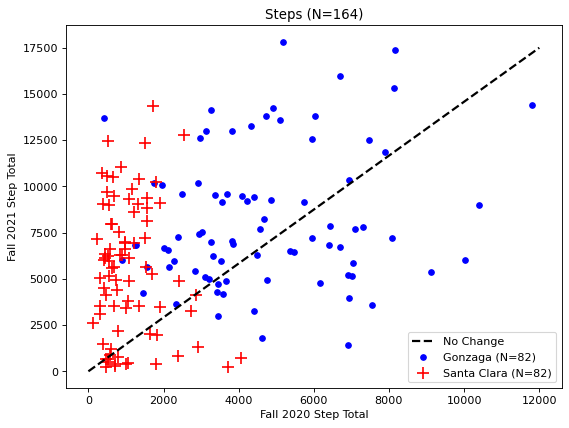

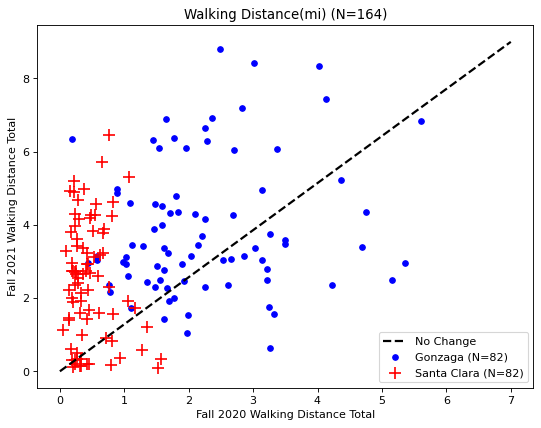

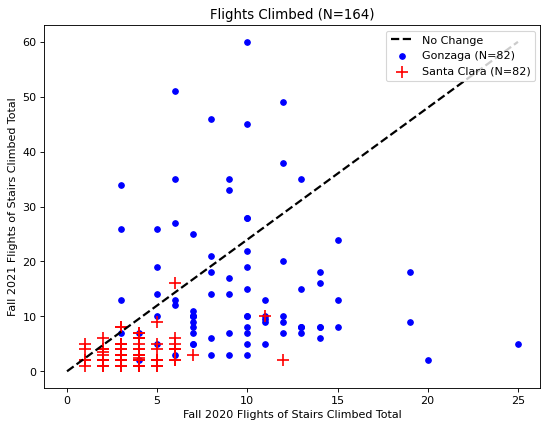

In [340]:
# For Steps
utils.scatter_steps(liam_steps_2020_ser, liam_steps_2021_ser, ana_steps_2020_ser, ana_steps_2021_ser)

#For Walking Distance
utils.scatter_dis(liam_walk_dis_2020_ser, liam_walk_dis_2021_ser, ana_walk_dis_2020_ser, ana_walk_dis_2021_ser)

#For the number of flights climbed
utils.scatter_flights(liam_flights_2020_ser, liam_flights_2021_ser, ana_flights_2020_ser, ana_flights_2021_ser)



#### Bar Graphs

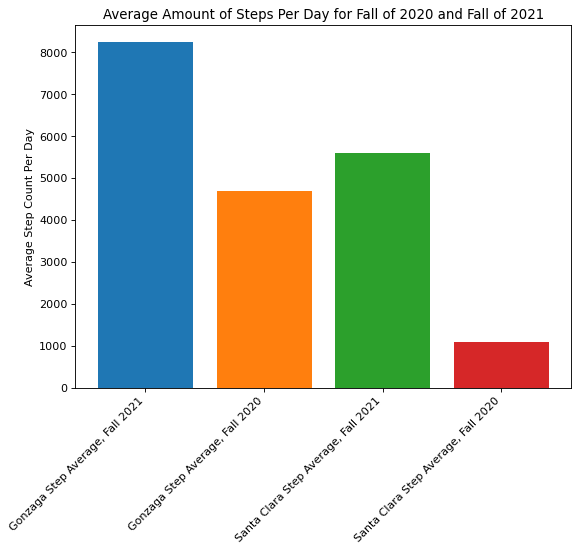

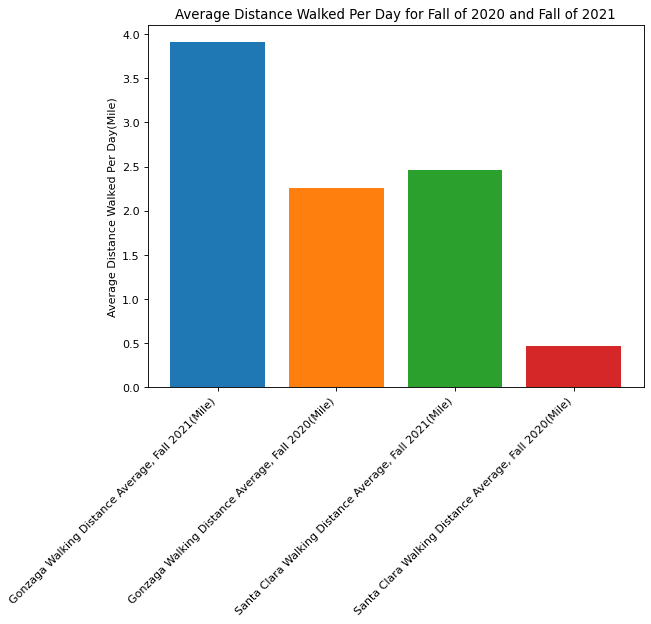

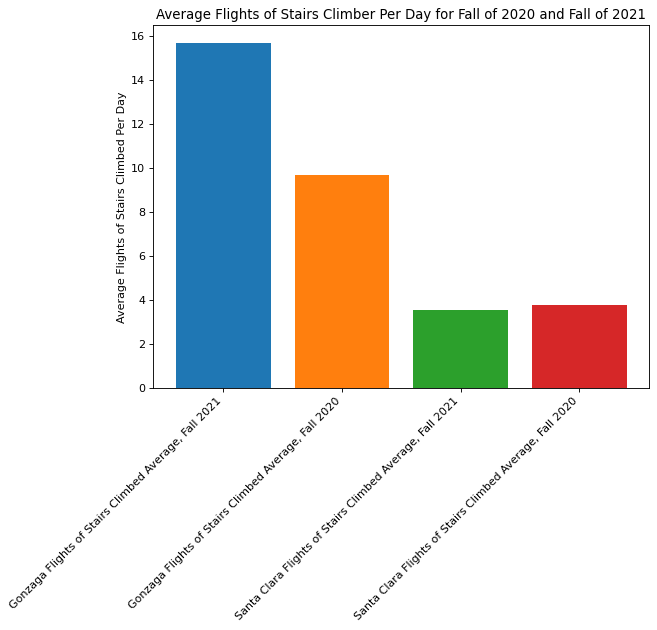

In [341]:
# For Steps
utils.bar_steps(liam_steps_2020_ser, liam_steps_2021_ser, ana_steps_2020_ser, ana_steps_2021_ser)

# #For Walking Distance
utils.bar_dis(liam_walk_dis_2020_ser, liam_walk_dis_2021_ser, ana_walk_dis_2020_ser, ana_walk_dis_2021_ser)

# #For Flights Climbed 
utils.bar_flights(liam_flights_2020_ser, liam_flights_2021_ser, ana_flights_2020_ser, ana_flights_2021_ser)


### Reflection
The graphs further visualize my findings regarding activity during Fall 2020 and Fall 2021. It shows a stark contrast in how our patterns have changed when forced into a lockdown type setting. The discrepency between Santa Clara's flights climbed is also shown within both the bar graph and scatter plot graph. 

## Activty for Friday in Fall 2020 and Monday in Fall 2021 EDA

#### 1. Identify the null and alternative hypothesis

$H_o$: The average activity, measured in step count, distance walked, and flights climbed, on Monday's in Fall of 2021, will be less than or equal to the average activity, on Fridays in Fall of 2020

*  ( $\mu_{Fall_{M2021}}$ $\le$ $\mu_{Fall_{F2020}}$)  

$H_1$:  The average activity on Monday's in Fall of 2021, will be more than the average activity on Friday's, Fall of 2020
*  ( $\mu_{Fall_{M2021}}$ > $\mu_{Fall_{F2020}}$)

#### 2. Level of significance 

*  $\alpha$ = 0.005

#### 3. Select the appropriate test statistic 

## * $t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{S_{p}^2(\frac{1}{n_1}+ \frac{1}{n_2})}}$

#### 4. Formulate the decision value 
* $\alpha$ = 0.005  
* 1-tailed test  
* df = 120

if t-computed > 2.617, then reject $H_o$  
if t-computed $\le$ 2.617, do not reject $H_o$

#### Description 
The data I will be using is a subset of the previous health data. Instead of focusing on the data as a whole, I will be splitting it on Mondays and Fridays for 2021 and 2020 respectively. I will be using a one tailed two sample test because there are two samples involved and the test will be dealing with inequality rather than being equal to. The test will be an independent test because I will not be comparing the same day. 

In [342]:
#Parsing the data
liam_day_of_week_2020 = liam_health_data_2020_df.groupby("Day of Week")
liam_day_of_week_2021 = liam_health_data_2021_df.groupby("Day of Week")

ana_day_of_week_2020 = ana_health_data_2020_df.groupby("Day of Week")
ana_day_of_week_2021 = ana_health_data_2021_df.groupby("Day of Week")

#Grabbing the Monday and Friday stats
liam_friday_2020_dict = liam_day_of_week_2020.get_group(4)
liam_monday_2021_dict = liam_day_of_week_2021.get_group(0)
liam_friday_2020_dict.drop("2020-11-20 00:00:00", axis=0, inplace=True)

ana_friday_2020_dict = ana_day_of_week_2020.get_group(4)
ana_monday_2021_dict = ana_day_of_week_2021.get_group(0)
ana_friday_2020_dict.drop("2020-11-20 00:00:00", axis=0, inplace=True)

#Parsing the Friday and Monday dictionaries 
#For Steps
liam_friday_steps_ser = liam_friday_2020_dict["Step Count (count)"]
ana_friday_steps_ser = ana_friday_2020_dict["Step Count (count)"]

liam_monday_steps_ser = liam_monday_2021_dict["Step Count (count)"]
ana_monday_steps_ser = ana_monday_2021_dict["Step Count (count)"]

#For distance walked/ran
liam_friday_dis_ser = liam_friday_2020_dict["Walking + Running Distance (mi)"]
ana_friday_dis_ser = ana_friday_2020_dict["Walking + Running Distance (mi)"]

liam_monday_dis_ser = liam_monday_2021_dict["Walking + Running Distance (mi)"]
ana_monday_dis_ser = ana_monday_2021_dict["Walking + Running Distance (mi)"]


# For Flights climbed 
liam_friday_flights_ser = liam_friday_2020_dict["Flights Climbed (count)"]
ana_friday_flights_ser = ana_friday_2020_dict["Flights Climbed (count)"]

liam_monday_flights_ser = liam_monday_2021_dict["Flights Climbed (count)"]
ana_monday_flights_ser = ana_monday_2021_dict["Flights Climbed (count)"]



/Users/liamnavarre/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Data Cleaning 
During the process of parsing the data to be used within visualizations, I had to drop a row from the friday dictionary. This was due to the fact the two series weren't equal in length, meaning I can't use the graph functions within matplotlib.

### Performing t-tests

In [343]:
utils.steps_t_test_ind(liam_monday_steps_ser, liam_friday_steps_ser, ana_monday_steps_ser, ana_friday_steps_ser)
utils.walk_dis_t_test_ind(liam_monday_dis_ser, liam_friday_dis_ser, ana_monday_dis_ser, ana_friday_dis_ser)
utils.flights_t_test_ind(liam_monday_flights_ser, liam_friday_flights_ser, ana_monday_flights_ser, ana_friday_flights_ser)


t-computed for Gonzaga steps: 3.9536227683406566 p-value for Gonzaga steps: 0.0007840901916769648
t-computed for Santa Clara steps: 5.945008252525678 p-value for Santa Clara steps: 8.174423768824297e-06

t-computed for Gonzaga walking distance: 3.614458846589331 p-value for Gonzaga walking distance: 0.001729265735067521
t-computed for Santa Clara walking distance: 5.881796287569842 p-value for Santa Clara walking distance: 9.39713238106548e-06

t-computed for Gonzaga flights climbed: 8.549638137332202 p-value for Gonzaga flights climbed: 4.1137223711977575e-08
t-computed for Santa Clara flights climbed: -1.5882027766319677 p-value for Santa Clara flights climbed: 0.12792468167445809


### Make a Decision
We reject the null hypothesis for majority of our data. Our t-computed value is much larger than our t-critical, thus resulting in the rejection of the null hypothesis. Meaning, Gonzaga was more active on Mondays during Fall 2021 than Fridays during Fall 2020. This is also true for Santa Clara, with the exception of flights climbed. Santa Clara actually climbed more flights of stairs on Friday's of Fall 2020 than Monday's of Fall 2021. This is the only exception. Santa Clara dramatically walked more on Mondays of Fall 2021 than Fridays of Fall 2020. 

### Reflection 
This hypothesis test shows the dramatic affect the Covid-19 pandemic had on college activity and social life. Fridays are considered the most active day of the week for the majority of college student. While Mondays are generally work days, meaning college students spend most of their time working on homework, studying for exams, etc. Althought these generalizations are normally true, due to the Covid-19 pandemic, the opposite is seen. Mondays are much more active now that society is moving past the peak of the pandemic. While Fridays were much less active during the peak of the pandemic.   

## Data Visualizations
I will now be using graphs to make the data more consumable and easier to understand

#### Scatter Plots

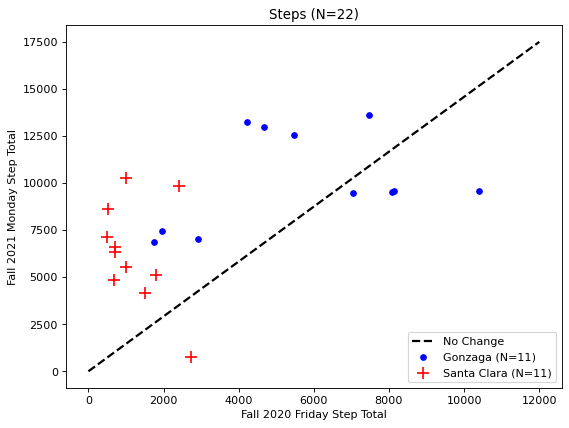

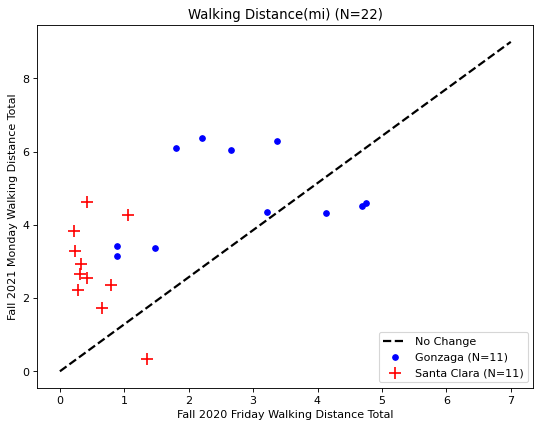

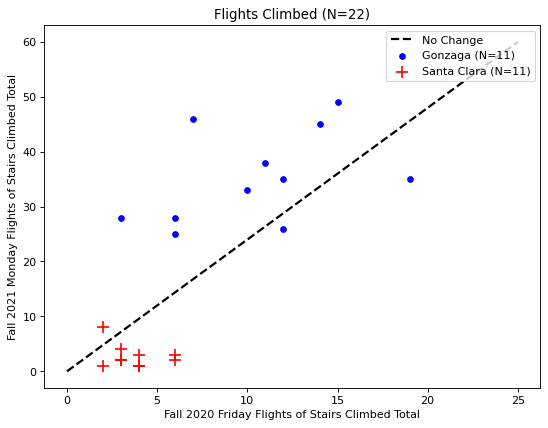

In [344]:
# For Steps
utils.scatter_steps_ind(liam_friday_steps_ser, liam_monday_steps_ser, ana_friday_steps_ser, ana_monday_steps_ser)

#For Walking Distance
utils.scatter_dis_ind(liam_friday_dis_ser, liam_monday_dis_ser, ana_friday_dis_ser, ana_monday_dis_ser)

#For the number of flights climbed
utils.scatter_flights_ind(liam_friday_flights_ser, liam_monday_flights_ser, ana_friday_flights_ser, ana_monday_flights_ser)

#### Bar Graphs

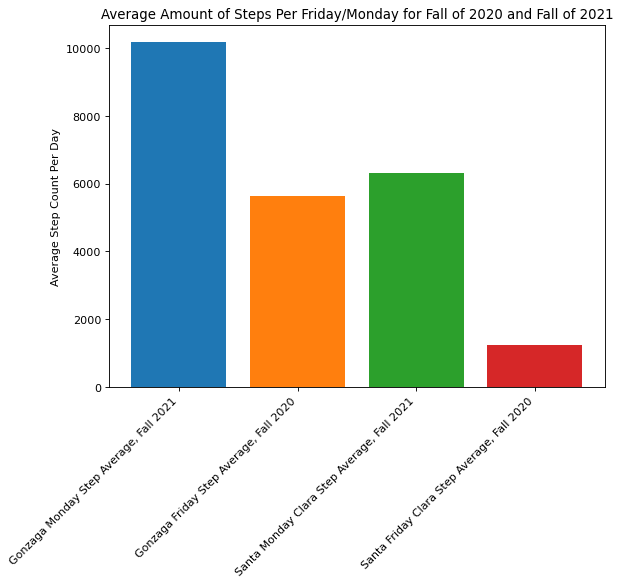

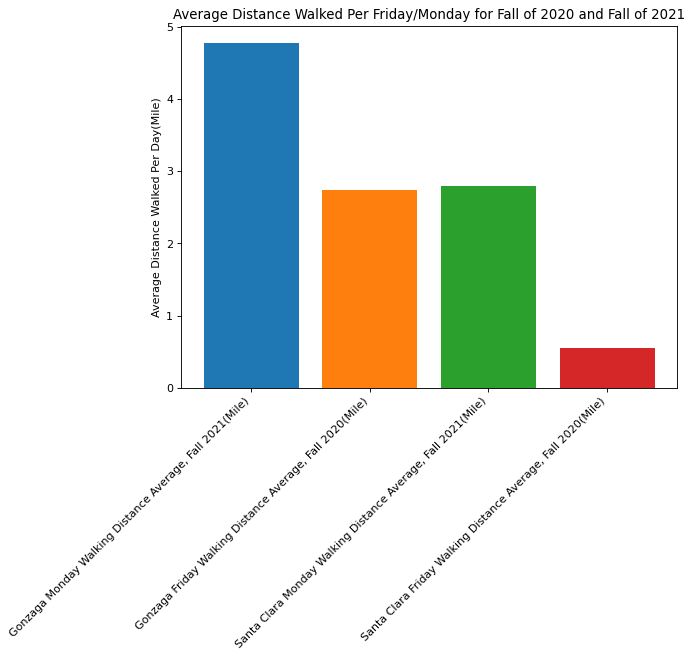

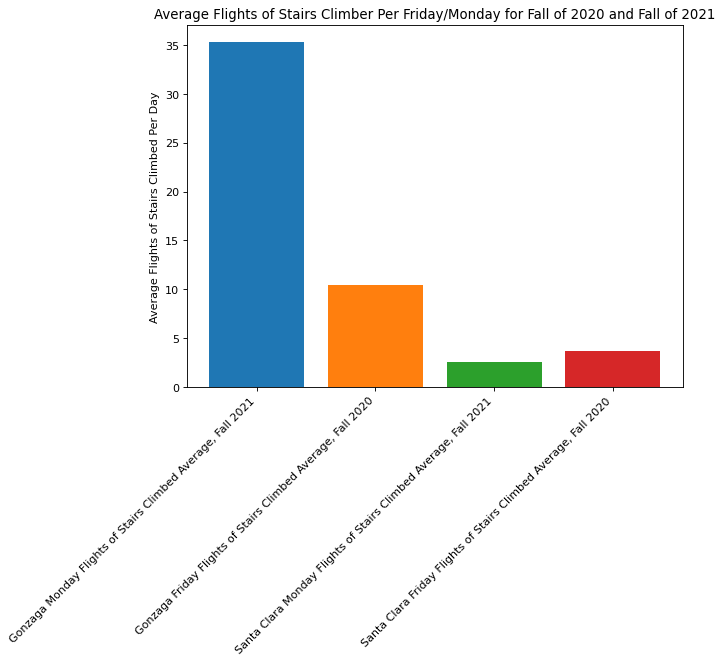

In [345]:
#For Steps
utils.bar_steps_ind(liam_friday_steps_ser, liam_monday_steps_ser, ana_friday_steps_ser, ana_monday_steps_ser)
#For Distance
utils.bar_dis_ind(liam_friday_dis_ser, liam_monday_dis_ser, ana_friday_dis_ser, ana_monday_dis_ser)
#For Flights
utils.bar_flights_ind(liam_friday_flights_ser, liam_monday_flights_ser, ana_friday_flights_ser, ana_monday_flights_ser)

### Visualization Reflection 
The Bar graphs put into better perspective how stark the contrast is from Fall 2020 to Fall 2021. The data set is fairly small due to the fact that the data was recorded roughly around 11 weeks, so there is only 11 samples for Monday and Friday data. Meaning outliers can lead to a dramatic change within the data set. Even so, it shows how much more active students are during Monday's of Fall 2021 versus Fridays of Fall 2020 

## Classification
* What am I predicting: The attribute I'll be trying to predict is wether or not the student goes to Gonzaga. Meaning, does the unseen instance match the activity a student at Gonzaga has or the activity a student at Santa Clara has.   

* What's my hypothesis: I believe if the activity score is generally higher, then it will fall within the Gonzaga prediction. Which implicates, if the student is more active then they are more likely to go to gonzaga.   

* What am I comparing to: I will be using the flights of stairs climbed, Step count, walking/running distance, and day of the week for my comparison. This will be used to show if the student goes to Gonzaga or not.   

* How am I evaluating performance: I will be using the accuracy score from the sklearn.metrics library, decision tree classifier, and cross validation.  

#### Hold Out Method, Decision Tree Method, and Cross Validation Method

In [346]:
ana_liam_df = liam_health_data_df.append(ana_health_data_df, ignore_index=True)

X = ana_liam_df.drop("Gonzaga", axis=1)
Y = ana_liam_df["Gonzaga"]
utils.hold_out_decision_tree_cross(X,Y)

Hold Out Method: 0.8258928571428571
Decision Tree Accuracy: 0.8080357142857143
Cross Validation Accuracy: 0.7829977628635347
Cross Validation Accuracy: 0.8031319910514542


#### Results
The accuracy results of the hold out method and the decision tree method are 82.59% and 81.25% respectively. The accuracy for cross validation resuled in 80.31%. This causes the average accuracy to be 81.38%

## Conclusion 
The data set I used was the health data from myself, a Gonzaga student, and my girlfriend, a Santa Clara student. The data was recorded via the apple health data app, so data collection was automatic. The data recorded general activity stats such as steps, walking distance, and flights of stairs climbed. The data was based off the information gathered via their phone, which can result in some skewed data. Meaning if the user doesn't presently have their phone on them, then their data isn't collected.   

The challenges within my classification, is that the data is not consistent. Due to data set being recorded based on human activity, there is an abstract form of human error involved. Naturally humans like to follow their daily routines or patterns but not everyone is consistent with this fact. So although I was overall more active during fall 2021, I'm certain there are plenty of days where the data looks as if I'm in fall of 2020. That's the tough part about basing the prediction on human patterns. If this classification was based on stable car pricing, I assume the predictions would be more accurate. 

The classification approach I used was to determine wether or no the data was my own "Gonzaga" or wether it was my girlfriends "Santa Clara." The classifier resulted in an average of 81.38% accuracy. I believe I could improve this accuracy further by testing activity on certain days of the week to build a model of activity on those specific days. Once that model of activity is understood and tested, my classification accuracy should be a lot higher. Meaning not only does my model understand the activity patterns of myself versus my girlfriend, but my model also understands our activity patterns given the day of the week. 

I believe the impacts of this project would be to better understand how your activity affects your everyday life. In the sense of, how was your mental state when you were more active versus less active. The same can be said for physical health. I just believe this project is a good gauge to understand just how much we were restricted due to the Covid-19 pandemic. In regards to ethical concerns, I believe if this model was built to the degree of being able to determine your activity on any given day of the week is cause for concern. This could result in an invasion of privacy regarding the users patterns. In regards to it's current state, I believe if used on large groups of people and not in an academic setting, this is a huge invasion of privacy. While currently, I feel like my work is harmless in the sense of outlining how the pandemic has affected our activity, if expanded upon I could see large issues within the ethics behind it. 